In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar los datos de fact_sales
fact_sales = pd.read_csv("fact_sales.csv")
dim_customers = pd.read_csv("dim_customers.csv")
dim_products = pd.read_csv("dim_products.csv")
dim_payments = pd.read_csv("dim_payments.csv")
dim_malls = pd.read_csv("dim_malls.csv")
dim_dates = pd.read_csv("dim_dates.csv")

# Merge para enriquecer fact_sales
df = (fact_sales
      .merge(dim_customers, on="customer_id")
      .merge(dim_products, on="product_id")
      .merge(dim_payments, on="payment_id")
      .merge(dim_malls, on="mall_id")
      .merge(dim_dates, on="date_id"))

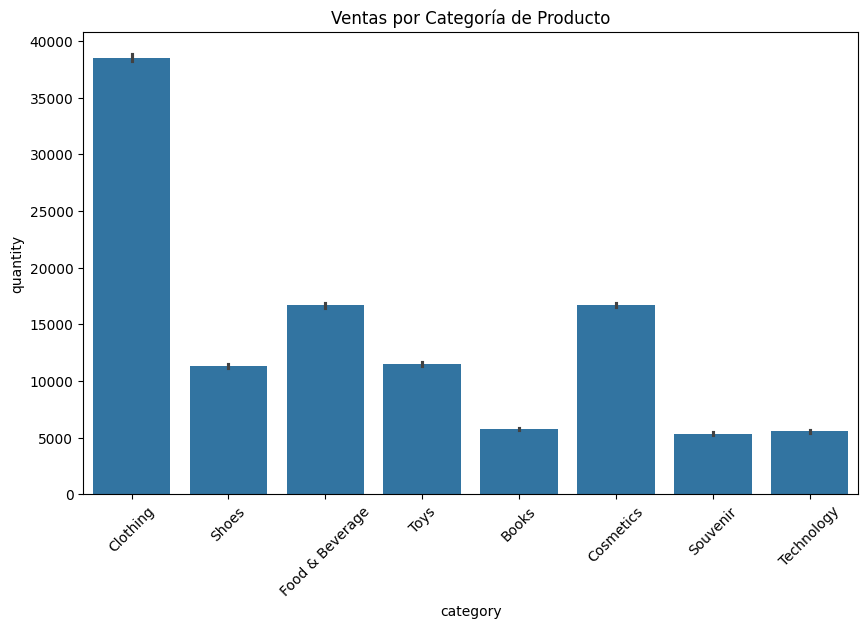

In [2]:
# Ventas por categoría de producto
plt.figure(figsize=(10,6))
sns.barplot(data=df, x="category", y="quantity", estimator=sum)
plt.title("Ventas por Categoría de Producto")
plt.xticks(rotation=45)
plt.show()

In [6]:
print(df.columns)
print(df.head())


Index(['invoice_no', 'customer_id', 'product_id', 'date_id', 'payment_id',
       'mall_id', 'quantity', 'price', 'gender', 'age', 'category',
       'payment_method', 'shopping_mall', 'invoice_date', 'year', 'month',
       'day'],
      dtype='object')
  invoice_no customer_id  product_id   date_id  payment_id  mall_id  quantity  \
0    I138884     C241288           1  20220508           1        1         5   
1    I317333     C111565           2  20211212           2        2         3   
2    I127801     C266599           1  20210911           3        3         1   
3    I293455     C159642           1  20210411           1        3         3   
4    I336189     C555402           1  20220306           1        1         2   

     price  gender  age  category payment_method   shopping_mall invoice_date  \
0  1500.40  Female   28  Clothing    Credit Card          Kanyon   2022-05-08   
1  1800.51    Male   21     Shoes     Debit Card  Forum Istanbul   2021-12-12   
2   300.08    M

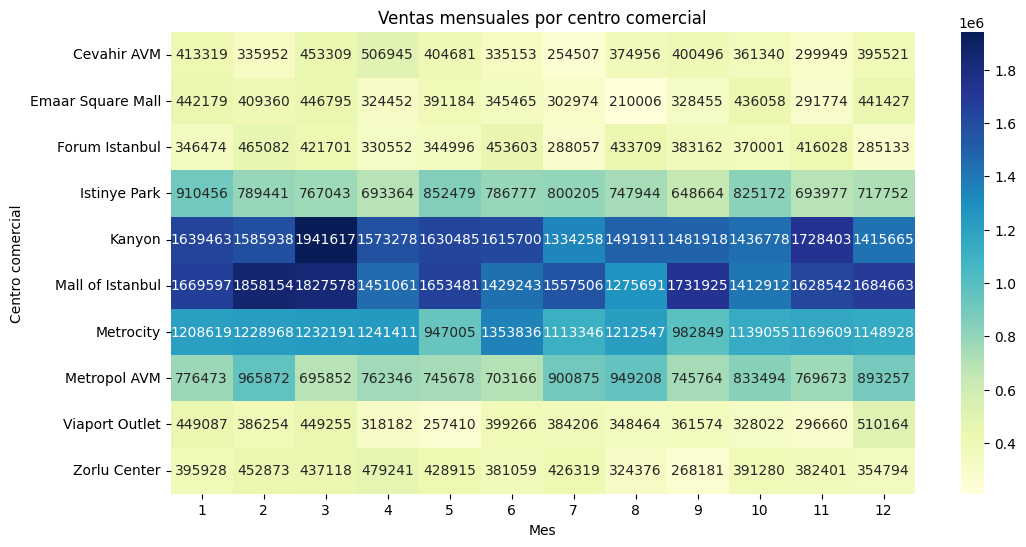

In [8]:

df["total_sales"] = df["quantity"] * df["price"]

pivot = df.pivot_table(
    index="shopping_mall", 
    columns="month", 
    values="total_sales", 
    aggfunc="sum"   
)

plt.figure(figsize=(12, 6))
sns.heatmap(pivot, annot=True, fmt=".0f", cmap="YlGnBu")
plt.title("Ventas mensuales por centro comercial")
plt.ylabel("Centro comercial")
plt.xlabel("Mes")
plt.show()


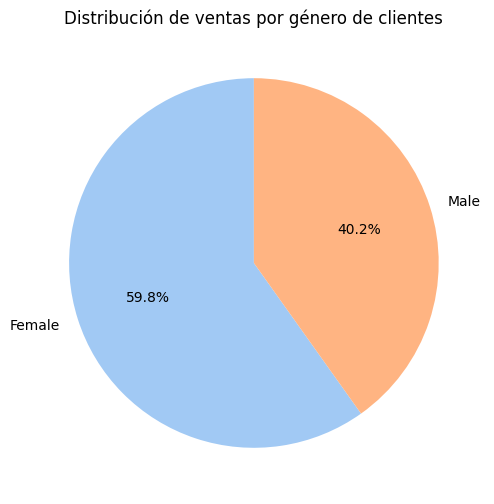

In [9]:
# Ventas totales por género
ventas_genero = df.groupby("gender")["price"].sum()

plt.figure(figsize=(6, 6))
plt.pie(
    ventas_genero,
    labels=ventas_genero.index,
    autopct="%1.1f%%",
    startangle=90,
    colors=sns.color_palette("pastel")
)
plt.title("Distribución de ventas por género de clientes")
plt.show()


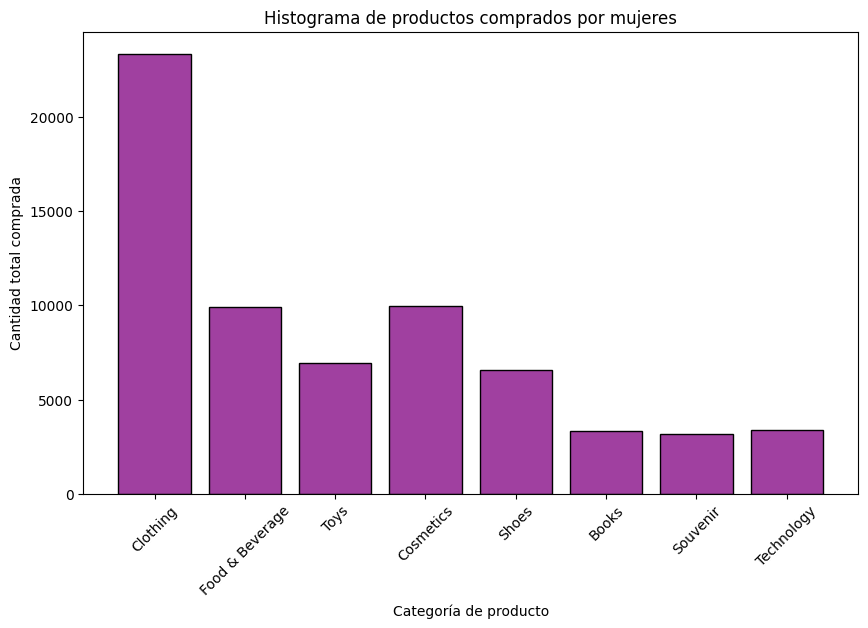

In [10]:
# Filtrar solo mujeres
df_mujeres = df[df["gender"] == "Female"]

# Histograma de productos más comprados por mujeres
plt.figure(figsize=(10, 6))
sns.histplot(
    data=df_mujeres,
    x="category",
    weights="quantity",   # usamos la cantidad como peso
    discrete=True,        # categorías discretas
    shrink=0.8,           # espacio entre barras
    color="purple"
)
plt.title("Histograma de productos comprados por mujeres")
plt.xlabel("Categoría de producto")
plt.ylabel("Cantidad total comprada")
plt.xticks(rotation=45)
plt.show()


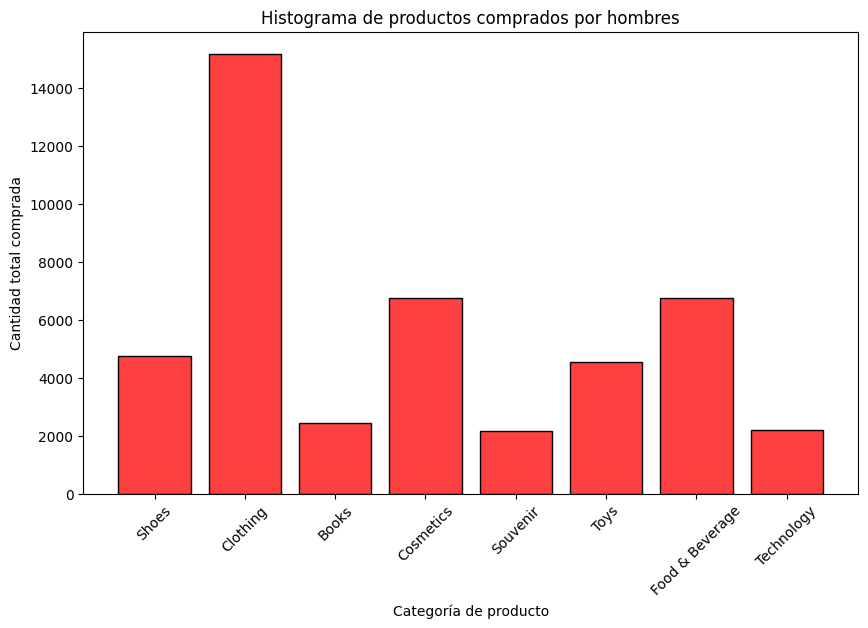

In [12]:

df_hombres = df[df["gender"] == "Male"]

plt.figure(figsize=(10, 6))
sns.histplot(
    data=df_hombres,
    x="category",
    weights="quantity",   # usamos la cantidad como peso
    discrete=True,        # categorías discretas
    shrink=0.8,           # espacio entre barras
    color="red"
)
plt.title("Histograma de productos comprados por hombres")
plt.xlabel("Categoría de producto")
plt.ylabel("Cantidad total comprada")
plt.xticks(rotation=45)
plt.show()